In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

In [2]:
X, y = mnist['data'], mnist['target'] #data contiene le istanze, target contiene le label
X.shape #array 2d ci sono 70000 immagini, e ogni immagine ha 784 attributi = 28 x 28 px, ogni attributo rappresenta il colore
                                    #  del pixel, da 0 a 255 bianco/nero

(70000, 784)

In [3]:
y.shape
X[0:1]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


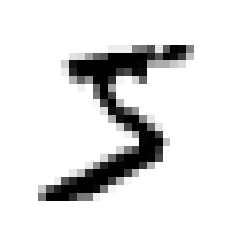

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.to_numpy()[0,:]
some_digit_image= some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis('off')
plt.show()



In [5]:
y[0] #stringa 

'5'

In [6]:
import numpy as np
y = y.astype(np.uint8) #  rendo le labels int
y[0]

5

In [7]:
#  Separo training set da test set
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000], y[60000:] # MNIST dataset è gia pronto per essere diviso
y_train_5 = (y_train==5) #riconosce solo i 5 
y_test_5 = (y_test==5) #sono tutti false apparte i 5 True

In [8]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [9]:
sgd_clf.predict(some_digit.reshape(1, -1)) # ha riconosciuto che l'immagine è un 5 true

C:\Users\Mattia\list\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3,shuffle = True, random_state = 42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

0.9669
0.91625
0.96785


In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')


array([0.95035, 0.96035, 0.9604 ])

In [12]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)

never_5_clf = Never5Classifier()
# print(never_5_clf.predict(X_train[20:100]))
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy' )
#il 10% del dataset sono 5 infatti accuracy intorno a 90%

array([0.91125, 0.90855, 0.90915])

In [13]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred) # consiste nel contare il numero di volte in cui l'istanza di classe A viene classificata B

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [15]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)
#  l'83 % dei casi in cui è 5 viene riconosciuto giusto

0.8370879772350012

In [16]:
recall_score(y_train_5, y_train_pred) # il 65% dei 5 sono stati riconosciuti

0.6511713705958311

In [17]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)


0.7325171197343846

In [18]:
y_scores = cross_val_predict(sgd_clf,X_train, y_train_5, cv = 3, method='decision_function')
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_train_5, y_scores)

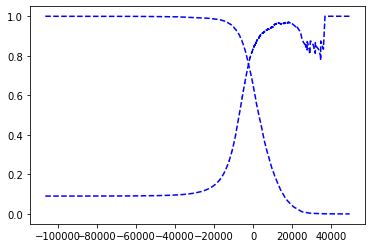

In [19]:
def plot_precision_recall_vs_threshold(precision,recalls,thresholds):
    plt.plot(thresholds, precision[:-1],'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1],'b--', label='Recall')
#     plt.margins(x=11, y=10)  
plot_precision_recall_vs_threshold(precision, recall, thresholds)
plt.show()

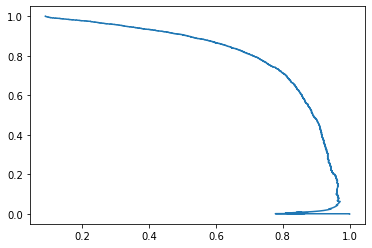

In [20]:
def plot_precision_vs_recall(precision, recalls):
    plt.plot(precision[:-1],recalls[:-1])
    
plot_precision_vs_recall(precision, recall)
plt.show()

In [21]:
threshold_90_precision = thresholds[np.argmax(precision >= 0.90)] #restituisce il primo indice del valore piu alto (True)
threshold_90_precision

3370.019499143957

In [22]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_score(y_train_5, y_train_pred_90)


0.9000345901072293

In [23]:
recall_score(y_train_5, y_train_pred_90)


0.4799852425751706

In [25]:
from sklearn.metrics import roc_curve
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--') # k-- tratteggiato
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")

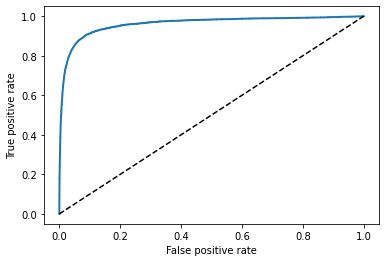

In [26]:
fpr, tpr, thresholds =roc_curve(y_train_5, y_scores) #false positive rate (FPR), true positive rate (TPR/Recall)

plot_roc_curve(fpr,tpr,'ROC')

In [27]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)


0.9604938554008616

In [28]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method='predict_proba')
y_scores_forest = y_probas_forest[:,1]


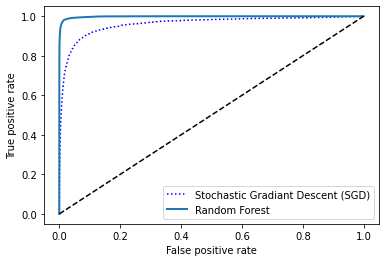

In [29]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
plt.plot(fpr,tpr,'b:', label="Stochastic Gradiant Descent (SGD)")
plot_roc_curve(fpr_forest,tpr_forest,'Random Forest')
plt.legend(loc='lower right')
plt.show()

In [30]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
forest_clf.predict(some_digit.reshape(1, -1))

C:\Users\Mattia\list\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [32]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # OvO predictions 45 classi binarie allenate
svm_clf.predict([some_digit])

C:\Users\Mattia\list\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [33]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores # dieci score per istanza uno per classe 0.1.2.3...9

C:\Users\Mattia\list\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [34]:
np.argmax(some_digit_scores)

5

In [35]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train) # OvR predictions
ovr_clf.predict([some_digit])
len(ovr_clf.estimators_)

In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

In [ ]:
sgd_clf.decision_function([some_digit])

In [ ]:
cross_val_unscaled = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
scaler = StandardScaler() # scalando l'input si ottengono risultati migliori
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))


In [ ]:
cross_val_score_sgd =cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx_sgd = confusion_matrix(y_train, y_train_pred)
print(f'Confusion matrix sgd su MNIST: {conf_mx_sgd}')
print(f'Cross val score sgd non scalato: {cross_val_unscaled}')
print(f'Cross val score sgd su MNIST: {cross_val_score_sgd}')

In [ ]:
conf_mx_sgd

In [ ]:
plt.matshow(conf_mx_sgd, cmap=plt.cm.gray)
plt.show()

In [ ]:
row_sums = conf_mx_sgd.sum(axis=1, keepdims=True) #per ogni riga fa la somma
norm_conf_mx = conf_mx_sgd / row_sums 
np.fill_diagonal(norm_conf_mx, 0) # riempio la diagonale di 0 cosi considero solo gli errori
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()
#  spesso riconosce un 8 al posto del 5

In [38]:
def plot_digit(data):
#     print(f'Size: {np.size(data)}')
#     print(f'Shape: {np.shape(data)}')
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [ ]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

# print(X_aa)
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25].to_numpy(), images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25].to_numpy(), images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25].to_numpy(), images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25].to_numpy(), images_per_row=5)

plt.show()

# I BLOCCHI A SINISTRA SONO LE IMMAGINI CLASSIFICATE COME 3 E QUELLI A DESTRA LE IMMAGINI CLASSIFICATE COME 5

In [ ]:
# AGGIUNGO UN MODELLO PER PULIRE LE IMMAGINI CON 'FASTIDI'
noise = np.random.randint(0,50,(len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0,50,(len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [ ]:

knn_clf.fit(y_train_mod,y_train_mod)
data = X_train_mod.to_numpy()[0:1]
clean_data = X_train.to_numpy()[0:1]
plot_digit(data)
plt.show()
plot_digit(clean_data)
plt.show()

In [ ]:
plot_digit(knn_clf.predict(data))

In [ ]:
!pip uninstall numpy

from tkinter import *
import tkinter as tk
import win32gui
import cv2

from PIL import ImageGrab, Image,ImageOps
class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0
        
        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Draw..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command = self.classify_handwriting)   
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
       
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        
        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")
        
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id()  # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND)  # get the coordinate of the canvas
        a,b,c,d = rect
        rect=(a+4,b+4,c-4,d-4)
#         im = ImageGrab.grab(rect).convert("L")
        im = ImageGrab.grab(rect)

        im = ImageOps.invert(ImageOps.grayscale(im))
        im_resized = im.resize((28,28))
        img = np.array(im.resize((28,28)))
        prev = forest_clf.predict(img.reshape(1, -1))
        plot_digit(img)
        print(f'Previsione: {prev}')
        self.label.configure(text= str(prev))

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')
       
app = App()
app.mainloop()

In [ ]:
#FINE TUNE THE MODEL
from sklearn.model_selection import GridSearchCV #libreria per cercare le migliori combinazioni di Hyperparameter nel modello
param_grid = [
    {'n_neighbors':[3,6,9,10],'weights':['uniform','distance']},
]
knn_grid = KNeighborsClassifier()
grid_search_knn_scaled = GridSearchCV(knn_grid, param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search_knn_scaled.fit(X_train_scaled,y_train)
grid_search_knn = GridSearchCV(knn_grid, param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search_knn.fit(X_train,y_train)

In [ ]:
cvres_scaled = grid_search_knn_scaled.cv_results_
for mean_score, params in zip(cvres_scaled['mean_test_score'],cvres_scaled['params']):
    print(f'score scaled {np.sqrt(-mean_score)}',params)
cvres = grid_search_knn.cv_results_
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(f'score not-scaled {np.sqrt(-mean_score)}',params)

In [ ]:
k_neighbors_clf = grid_search_knn.best_estimator_
k_neighbors_clf.fit(X_train,y_train)
k_neighbors_clf_scaled = grid_search_knn_scaled.best_estimator_
k_neighbors_clf_scaled.fit(X_train_scaled,y_train)


score_knn_MNIST = cross_val_score(k_neighbors_clf, X_train, y_train, cv=3, scoring='accuracy')
score_knn_MNIST_scaled = cross_val_score(k_neighbors_clf_scaled, X_train_scaled, y_train, cv=3, scoring='accuracy')

y_train_pred_knn = cross_val_predict(k_neighbors_clf, X_train, y_train, cv=3)
y_train_pred_knn_scaled = cross_val_predict(k_neighbors_clf_scaled, X_train_scaled, y_train, cv=3)


In [ ]:

conf_mx_knn = confusion_matrix(y_train, y_train_pred_knn)
conf_mx_knn_scaled = confusion_matrix(y_train, y_train_pred_knn_scaled)

print(f'Confusion matrix knn su MNIST: {conf_mx_knn}')
print(f'Cross val score knn su MNIST: {score_knn_MNIST}')
print(f'Confusion matrix knn su MNIST scalato: {conf_mx_knn_scaled}')
#print(f'Cross val score knn su MNIST scalato: {score_knn_MNIST_scaled}')

# #Implementazione CNN AI

In [29]:
# !C:/msys64/mingw64/bin/python.exe -m pip install ipykernel -U --user --force-reinstall


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D # convoluzione
from tensorflow.keras.layers import MaxPool2D # pulling riduzione immagine Max, pixel piu alto nella proiezione 
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5)) # taglio uno si uno no le connessioni con il layer finale regularization
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# example of a cnn for image classification
from tensorflow.train import latest_checkpoint
from tensorflow.keras.callbacks import ModelCheckpoint
import os
from tensorflow.keras.datasets.mnist import load_data

# load dataset
(x_train, y_train), (x_test, y_test) = load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
# determine the shape of the input images
in_shape = x_train.shape[1:]
# determine the number of classes
n_classes = len(np.unique(y_train))
print(in_shape, n_classes)
# normalize pixel values tra 0 e 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# define model

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
# cp_callback = ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)
latest = latest_checkpoint(checkpoint_dir)
# Create a new model instance
model = create_model()

# Load the previously saved weights
model.load_weights(latest)

# Re-evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)
(28, 28, 1) 10
313/313 - 5s - loss: 0.0407 - accuracy: 0.9872
Restored model, accuracy: 98.72%


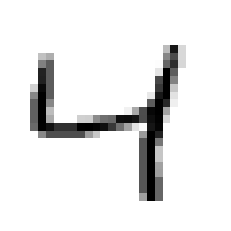

In [ ]:
plot_digit(x_train[2])

In [ ]:
from tkinter import *
import tkinter as tk
import win32gui
import cv2
from PIL import ImageGrab, Image,ImageOps
class App_CNN(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0
        
        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Draw..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command = self.classify_handwriting)   
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
       
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        
        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")
        
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id()  # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND)  # get the coordinate of the canvas
        a,b,c,d = rect
        rect=(a+4,b+4,c-4,d-4)
#         im = ImageGrab.grab(rect).convert("L")
        im = ImageGrab.grab(rect)

        im = ImageOps.invert(ImageOps.grayscale(im))
        im_resized = im.resize((28,28))
        img = np.array(im.resize((28,28)))        
        prev = np.argmax(model.predict(np.asarray([img.reshape(28,28,1)])))
#         img = np.array(im)
#         print(img_shape.shape())
        
#         img = img[:,:,0]

#         reshaoed_img = cv2.resize(im,(784,784))
#         print(img)
        plot_digit(img)
        print(f'Previsione: {prev}')
#         digit, acc = predict_digit(im)
        self.label.configure(text= str(prev))

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=12
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')
       
app = App_CNN()
app.mainloop()

(28, 28)
Previsione: 4
(28, 28)
Previsione: 6
(28, 28)
Previsione: 5
(28, 28)
Previsione: 9
(28, 28)
Previsione: 4
(28, 28)
Previsione: 5
(28, 28)
Previsione: 6
(28, 28)
Previsione: 3
(28, 28)
Previsione: 3
(28, 28)
Previsione: 8
(28, 28)
Previsione: 4
(28, 28)
Previsione: 6
(28, 28)
Previsione: 0


In [ ]:
image = x_train[0]
prev = model.predict(np.asarray([image]))
print(image.shape)

(28, 28, 1)


## Testing

In [12]:
from tkinter import *
import tkinter as tk
import win32gui
import cv2
from PIL import ImageGrab, Image,ImageOps
class App_CNN(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0
        
        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Draw..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command = self.classify_handwriting)   
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
       
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")
        
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id()  # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND)  # get the coordinate of the canvas
        a,b,c,d = rect
        rect=(a+4,b+4,c-4,d-4)
        im = ImageGrab.grab(rect)
        im = ImageOps.invert(ImageOps.grayscale(im))
        im_resized = im.resize((28,28))
        img = np.array(im.resize((28,28)))
        prev = np.argmax(model.predict(np.asarray([img.reshape(28,28,1)])))
        plot_digit(img)
        print(f'Previsione: {prev}')
        self.label.configure(text= str(prev))

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=12
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')
       

In [26]:
# !C:/msys64/mingw64/bin/python.exe -m pip install ipykernel -U --user --force-reinstall

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tensorflow.train import latest_checkpoint
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D # convoluzione
from tensorflow.keras.layers import MaxPool2D # pulling riduzione immagine Max, pixel piu alto nella proiezione 
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5)) # taglio uno si uno no le connessioni con il layer finale regularization
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [27]:

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
latest = latest_checkpoint(checkpoint_dir)
# Create a new model instance
model = create_model()

# Load the previously saved weights
model.load_weights(latest)


(28, 28)
Previsione: 1
(28, 28)
Previsione: 2
(28, 28)
Previsione: 6
(28, 28)
Previsione: 2
(28, 28)
Previsione: 2


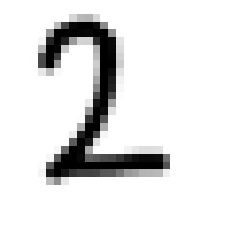

In [28]:
app = App_CNN()
app.mainloop()